In [1]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
import operator
import numpy as np

# Tram

Read the shape files and filter them so they have only the necessary data. 

In [158]:
nodes = gpd.read_file('../shapefiles/public_transport/tram/tram_nodes.shp', encoding='utf-8')
edges = gpd.read_file('../shapefiles/public_transport/tram/tram_edges.shp', encoding='utf-8')

50


<ipython-input-159-218891593299>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edges = edges.loc[edges['geometry'].length != 0]


<AxesSubplot:>

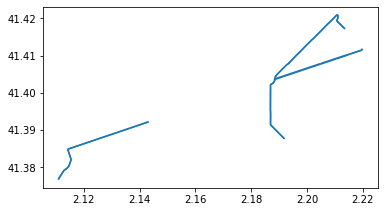

In [159]:
edges = edges.drop(101, axis = 0)
edges = edges.loc[edges['geometry'].length != 0]
print(edges.shape[0])
edges.plot()

Write a column for latitude and longitude 

In [160]:
nodes['lat'] = nodes.geometry.y
nodes['lon'] = nodes.geometry.x

Project the geodataframes

In [161]:
nodes.set_crs(epsg=ox.settings.default_crs[5:9], inplace=True)
nodes = ox.project_gdf(nodes)
edges.set_crs(epsg=ox.settings.default_crs[5:9], inplace=True)
edges = ox.project_gdf(edges)

Create position columns x and y in the nodes dataframe

In [162]:
nodes['y'] = nodes.geometry.y
nodes['x'] = nodes.geometry.x

Create origin and destination nodes in the edge dataframe

In [163]:
u = []
v = []
for geo in edges['geometry']:
    origin = False
    dest = False
    for coord in geo.coords:
        coord_error_add = tuple(map(operator.add, coord, (0.1,0.1)))
        coord_error_sub = tuple(map(operator.sub, coord, (0.1,0.1)))
        for index, row in nodes.iterrows():
            if (list(row['geometry'].coords)[0][0] >= coord_error_sub[0] and
                list(row['geometry'].coords)[0][0] <= coord_error_add[0] and
                list(row['geometry'].coords)[0][1] >= coord_error_sub[1] and
                list(row['geometry'].coords)[0][1] <= coord_error_add[1]): 
                
                if origin == False and dest == False:
                    u.append(index)
                    origin = True
                elif origin == True and dest == False:
                    if u[-1] != index:
                        v.append(index)
                        dest = True
                else: 
                    continue
                
                #print('   Coord ' + str(coord))
                #print('   Plus ' + str(coord_error_add))
                #print('   Minus ' + str(coord_error_sub))
                #print(str(index) + '    ' +  str(list(row['geometry'].coords)[0]))
    #print('------------------------------------------------')    
edges['v'] = v
edges['u'] = u

Add the necessary columns key and length

In [164]:
edges['key'] = np.zeros(edges.shape[0])
edges['length']= edges.geometry.length

In [165]:
nodes['osmid'] = nodes.index
edges['osmid'] = edges.index

In [166]:
G = ox.graph_from_gdfs(nodes,edges)

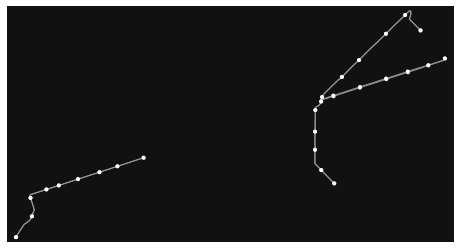

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [167]:
ox.plot_graph(G)

In [170]:
# Save the graph 
ox.save_graphml(G, filepath="../BCNgraphs/tram.graphml")

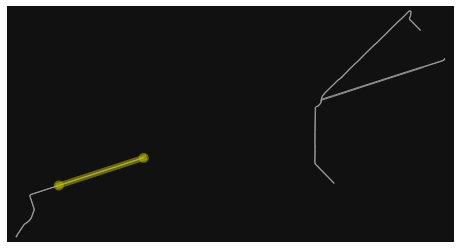

[48, 42, 44, 40, 38]


In [168]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[48]
dest = list(G)[38]

route = ox.shortest_path(G , orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G , route, route_color='y', route_linewidth=6, node_size=0)
print(route)

# Subway

In [147]:
nodes = gpd.read_file('../shapefiles/public_transport/subway/subway_nodes.shp', encoding='utf-8')
edges = gpd.read_file('../shapefiles/public_transport/subway/subway_edges.shp', encoding='utf-8')

266


<ipython-input-148-b3fd73811b16>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edges = edges.loc[edges['geometry'].length != 0]


<AxesSubplot:>

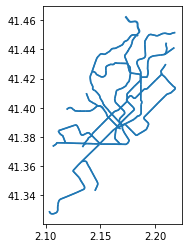

In [148]:
edges = edges.loc[edges['geometry'].length != 0]
print(edges.shape[0])
edges.plot()

In [149]:
nodes['lat'] = nodes.geometry.y
nodes['lon'] = nodes.geometry.x

In [150]:
nodes.set_crs(epsg=ox.settings.default_crs[5:9], inplace=True)
nodes = ox.project_gdf(nodes)
edges.set_crs(epsg=ox.settings.default_crs[5:9], inplace=True)
edges = ox.project_gdf(edges)

In [151]:
nodes['y'] = nodes.geometry.y
nodes['x'] = nodes.geometry.x

In [152]:
u = []
v = []
margin = 0.1
for geo in edges['geometry']:
    origin = False
    dest = False
    for coord in geo.coords:
        coord_error_add = tuple(map(operator.add, coord, (margin,margin)))
        coord_error_sub = tuple(map(operator.sub, coord, (margin,margin)))
        for index, row in nodes.iterrows():
            if (list(row['geometry'].coords)[0][0] >= coord_error_sub[0] and
                list(row['geometry'].coords)[0][0] <= coord_error_add[0] and
                list(row['geometry'].coords)[0][1] >= coord_error_sub[1] and
                list(row['geometry'].coords)[0][1] <= coord_error_add[1]): 
                
                if origin == False and dest == False:
                    u.append(index)
                    print(str(index) + '     ' + row['name'] + '     ' + str(row['osm_id']))
                    origin = True
                elif origin == True and dest == False:
                    if u[-1] != index:
                        v.append(index)
                        print(str(index) + '     ' + row['name'] + '     ' + str(row['osm_id']))
                        dest = True
                else: 
                    continue
                
                #print('   Coord ' + str(coord))
                #print('   Plus ' + str(coord_error_add))
                #print('   Minus ' + str(coord_error_sub))
                #print(str(index) + '    ' +  str(list(row['geometry'].coords)[0]))
    print('------------------------------------------------')    
edges['v'] = v
edges['u'] = u

2     Vall d'Hebron (L3)     108253724
3     Penitents     108253730
------------------------------------------------
5     Plaça del Centre     191777835
6     Les Corts     191777837
------------------------------------------------
7     Palau Reial     191777840
8     Zona Universitària (L3)     251543380
------------------------------------------------
9     Sant Gervasi     255406869
10     Muntaner     255406873
------------------------------------------------
11     Provença     255406917
285     Bifurcació L6-L7     6
------------------------------------------------
10     Muntaner     255406873
12     la Bonanova     259649936
------------------------------------------------
12     la Bonanova     259649936
13     les Tres Torres     259649938
------------------------------------------------
14     Plaça Molina     259650063
15     Pàdua     259650072
------------------------------------------------
15     Pàdua     259650072
16     el Putxet     259650081
--------------------

97     Espanya (L1)     1417675798
------------------------------------------------
97     Espanya (L1)     1417675798
74     Rocafort     463164954
------------------------------------------------
77     Mercat Nou     463164959
98     Plaça de Sants (L1)     1417675799
------------------------------------------------
98     Plaça de Sants (L1)     1417675799
75     Hostafrancs     463164955
------------------------------------------------
22     Tarragona     462206272
99     Sants Estació (L3)     1479334838
------------------------------------------------
99     Sants Estació (L3)     1479334838
5     Plaça del Centre     191777835
------------------------------------------------
63     Verneda     462295977
100     La Pau (L2)     1736573947
------------------------------------------------
100     La Pau (L2)     1736573947
62     Sant Martí     462295973
------------------------------------------------
102     Onze de Setembre     1898613366
88     Bon Pastor     666852947
------

166     Verdaguer (L4)     3397396681
------------------------------------------------
137     La Pau (L2)     3397396615
167     Verneda     3397396682
------------------------------------------------
168     Via Júlia     3397396683
160     Trinitat Nova (L4)     3397396669
------------------------------------------------
140     Llucmajor     3397396623
168     Via Júlia     3397396683
------------------------------------------------
30     Besòs     462256407
169     La Pau (L4)     3397685399
------------------------------------------------
175     Can Peixauet     3398923283
286     Bifurcació L9-L10 Nord     7
------------------------------------------------
174     Can Cuiàs     3398923282
179     Ciutat Meridiana     3398923290
------------------------------------------------
171     Badal     3398923277
180     Collblanc (L5)     3398923291
------------------------------------------------
186     El Coll | La Teixonera     3398928299
185     El Carmel     3398928298
---------

105     Via Júlia     2888687445
------------------------------------------------
242     Paral·lel (L2)     3699659474
54     Sant Antoni     462295947
------------------------------------------------
243     Trinitat Nova (L3)     3699659475
46     Roquetes     462259779
------------------------------------------------
233     Vilapicina     3398928362
244     Virrei Amat     3801492593
------------------------------------------------
244     Virrei Amat     3801492593
201     Maragall (L5)     3398928322
------------------------------------------------
245     Virrei Amat     3801492594
79     Vilapicina     463213858
------------------------------------------------
111     Maragall (L5)     3371097299
245     Virrei Amat     3801492594
------------------------------------------------
69     Navas     462685386
246     La Sagrera (L1)     3889761684
------------------------------------------------
247     La Sagrera (L9N-L10)     3889761685
102     Onze de Setembre     1898613366
--

In [153]:
edges['key'] = np.zeros(edges.shape[0])
edges['length']= edges.geometry.length

In [154]:
nodes['osmid'] = nodes.index
edges['osmid'] = edges.index

In [155]:
G = ox.graph_from_gdfs(nodes,edges)

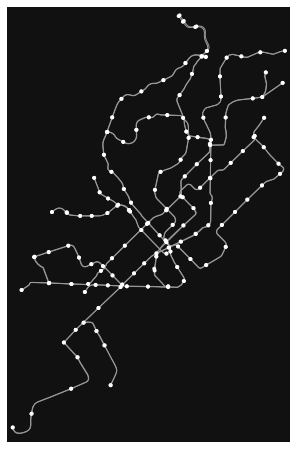

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [156]:
ox.plot_graph(G)

In [157]:
# Save the graph 
ox.save_graphml(G, filepath="../BCNgraphs/subway.graphml")

# Renfe